## Note
### 1. 初始化超平面
X：特征矩阵，W：权值向量weight，b:偏置bias
$${W * X + b} = 0$$
### 2. 判断误分类样本
使用函数间隔（functional margin）：$$y_{i}(w\cdot x_{i}+b)<0$$
### 3. 感知机的损失函数和梯度
M表示的是所有误分类点的集合，
损失函数: $$L(w, b) = - \frac{1}{\left \| w \right \|} \sum_{x_{i}\subset M{i}} y_{i}(w \cdot x_{i} + b)$$
梯度:计算梯度采取两种方法：
- batch gradient descend：使用所有误分类样本计算梯度
- stochastic gradient descend： 随机选取一个误分类样本计算梯度
$$\nabla_{w}L(w,b)=-\sum_{xi\in M}^{}yixi$$
$$\nabla_{b}L(w,b)=-\sum_{xi\in M}^{}yi$$
使用梯度下降更新w和b:  ($\lambda$ = 步长，学习率)
$$w = w + \lambda \sum_{x_{i}\subset M{i}}y_{i}x_{i}$$
$$b = b + \lambda \sum_{x_{i}\subset M{i}}y_{i}$$
### 4. 感知机的对偶形态
对偶形态下的w和b：N:样本数
$$w = \lambda \sum_{i=1}^{N}a_{i}y_{i}x_{i}$$
$$b = \lambda \sum_{i=1}^{N}a_{i}y_{i}$$
对偶形态下的损失函数：（$x_{j},y_{j}$是随机抽取的一个测试样本）
$$y_{j}(\lambda \sum_{i=1}^{N}a_{i}y_{i}x_{i} \cdot x_{j}+\lambda \sum_{i=1}^{N}a_{i}y_{i})<=0$$
### 5. 感知机由输入空间到输出空间的函数
$$f(x)=sign(w*x+b)$$
\
$$sign(x)=\left \{ 
\begin{aligned}
1 \quad x\geqslant 0 \\
-1  \quad x<0
\end{aligned}
\right.$$

In [32]:
#将数据转换成矩阵格式
#Batch

x_mat = np.mat(X)

#1. 初始化超平面（w，b）
w = np.mat(np.ones(X.shape[1])).T
b = 0
count=0
while True:
    count += 1
    
#     plt.scatter(X[:,0], X[:,1], cmap = 'cool', c = Y)
#     plt.plot(X[:,0],np.array(-w[0]/w[1] * X[:,0] - b/w[1]).ravel(),label=count)
#     plt.legend(loc=4)
    
    #2. 找出所有的误分类样本
    tmp = (np.array((x_mat * w + b)).ravel() * Y)
    
    if (tmp<0).sum()==0:#没有误分类样本
        break
        
    misclassified_X,misclassified_Y = X[tmp<0],Y[tmp<0] ##误分类
    print('loop{}-Missing:{}'.format(count,misclassified_X.shape[0]))
    
    #3. 计算梯度
    lam = 1  #lambda学习率
    gd_w = np.mat((misclassified_Y * misclassified_X.T).sum(axis=1)).T  #w的梯度
    gd_b = misclassified_Y.sum()  #b的梯度

    #4. 更新w，b
    w += lam*gd_w
    b += lam*gd_b
w,b

    


loop1-Missing:99
loop2-Missing:100
loop3-Missing:99
loop4-Missing:92
loop5-Missing:8
loop6-Missing:8
loop7-Missing:8
loop8-Missing:3
loop9-Missing:4
loop10-Missing:5
loop11-Missing:5
loop12-Missing:4
loop13-Missing:3
loop14-Missing:3
loop15-Missing:2
loop16-Missing:3
loop17-Missing:3
loop18-Missing:1
loop19-Missing:3
loop20-Missing:1
loop21-Missing:3
loop22-Missing:1
loop23-Missing:3
loop24-Missing:1
loop25-Missing:3
loop26-Missing:1
loop27-Missing:3
loop28-Missing:2
loop29-Missing:2
loop30-Missing:2
loop31-Missing:2
loop32-Missing:2
loop33-Missing:2
loop34-Missing:2
loop35-Missing:2
loop36-Missing:2
loop37-Missing:2
loop38-Missing:2
loop39-Missing:2
loop40-Missing:2
loop41-Missing:2
loop42-Missing:2
loop43-Missing:2
loop44-Missing:2
loop45-Missing:2
loop46-Missing:2
loop47-Missing:2
loop48-Missing:2
loop49-Missing:2
loop50-Missing:1
loop51-Missing:1
loop52-Missing:1
loop53-Missing:1
loop54-Missing:1
loop55-Missing:1
loop56-Missing:1
loop57-Missing:1
loop58-Missing:1
loop59-Missing:1
l

(matrix([[38.44808576],
         [62.18842263]]),
 -203)

(2, 1)

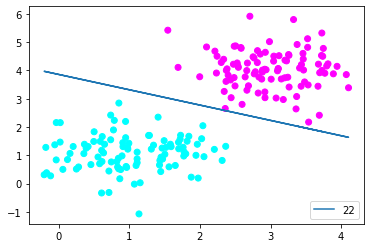

In [7]:
#将y=0替换成y=-1
Y[Y == 0] = -1 

#stochastic single sample
#1. 初始化 a, lambda步长
x_mat = np.mat(X)
a = np.zeros(X.shape[0])
lam = 0.1
count=0
#2. gram matrix
gram = np.array(x_mat * x_mat.T)

while True:
    count += 1
    miss_idx = -1  #误分类样本的index
    
    #3. 生成随机索引来实现随机抽取
    random_choice = np.random.choice(a=range(0,X.shape[0]),size=(1,X.shape[0]),replace=False).ravel()
    for j in random_choice:
        wx = lam * (a * Y * gram[j,:]).sum()
        b = lam * (a * Y).sum()
        check = Y[j] * (wx + b) #函数间隔
        if check <=0:
            miss_idx = j
            break
            
    #4. 更新a
    if miss_idx == -1:
        break
    a[miss_idx]+=1
w = (lam * (np.mat(a * Y) * X)).T
b = lam * (a * Y).sum()
plt.scatter(X[:,0], X[:,1], cmap = ['cool'], c = Y)
plt.plot(X[:,0],np.array(-w[0]/w[1] * X[:,0] - b/w[1]).ravel(),label=count)
plt.legend(loc=4)
w.shape

## 构建感知机类

In [262]:
class Ken_Perceptron():
    '''
    Perform Perceptron algorithm over ndarray X, Y.
    
    Label Y is expected to be 1D array, {-1,1}.
    
    Parameters:
    ----------
    learning_rate : float, default=0.1
        This is the 'lambda' used when updating w and b.
                
            - From formular: w += lam * gd_w
                
    method : {'batch', 'stochastic'}, default='stochastic' 
        The strategy used to calculate gradient descend.
        
        - If 'batch', all misclassified samples are used to calculate gradient descend.
        - If 'stochastic', only one randomly selected misclassified sample is used to calculate gradient descend.
                
    max_iteration : int, default=1000
        Maximum iterations before terminating the algorithm.
        
    Attributes
    ----------
    w_ : numpy.matrix of shape (n_sample,1)
        The 'w' parameter (weight vector) from below hyperplane formular:
            
            hyperplane formular: x * w + b = 0
    
    b_ : float
        The 'b' parameter (intercept) from below hyperplane formular:
            
            hyperplane formular: x * w + b = 0
    
    iter_count_ : int
        Number of iterations performed when generating the hyperplane.
    
    a_ : numpy.ndarray of shape (n_sample,)
        This is the duality parameter
        
        Note: Only available when 'stochastic' strategy is used.
    
    Methods
    ----------
    predict(Xtest) :
        Predict labels from the given Xtest.
        
    score(X,Y) : 
        Evaluating predict result, strategy: accuracy.
    
    plot(X,Y) : 
        This method visualizes the final hyperplane that is found.
        
        Note: Only available when X has exactly 2 features.
    
    demo(X,Y,time) : 
        This method demonstrates the evolution of the hyperplane over iterations.
        
        Note: Only available when X has exactly 2 features.
    '''

    
    def __init__(self,learning_rate=0.1,method='stochastic',max_iteration=1000):            
        self.learning_rate = learning_rate
        self.method = method
        self.max_iteration = max_iteration
        self.fitted=False
        
        
    def fit(self,X,Y):
        if set(Y)!={-1,1}:
            Y[Y!=1] = -1  

        if self.method=='batch':
            self.w_list_ , self.b_list_ , self.iter_count_ = self.batch(X,Y)
            self.w_ = self.w_list_[-1]
            self.b_ = self.b_list_[-1]
        if self.method=='stochastic':
            self.a_ , self.w_list_ , self.b_list_ , self.iter_count_ = self.stochastic(X,Y)
            self.w_ = self.w_list_[-1]
            self.b_ = self.b_list_[-1]        
        if self.iter_count_==self.max_iteration:
            print('Warning: maximum iteration reached! Dataset probably not linearly separable')

        self.X = X
        self.Y = Y    
        self.fitted = True
        
        return self
    
    
    def predict(self,Xtest):
        if self.fitted==False:
            return print('Preceptron not fitted!')
            
        x_mat = np.mat(Xtest)
        result = (x_mat * self.w_ + self.b_)
        result = (result>=0).astype(int)
        result[result==0]=-1
        return np.array(result).ravel()
        
    
    def score(self,Xtest,Ytest):
        if self.fitted==False:
            return print('Preceptron not fitted!')
        Y_pred = self.predict(Xtest)
        accuracy = (Y_pred==Ytest).sum()/len(Ytest)
        return accuracy
    
    
    def plot(self,cmap='RdYlBu',Xtest=None,Ytest=None):
        %matplotlib inline
        if self.fitted==False:
            return print('Preceptron not fitted!')
        
        if self.X.shape[1]!=2:
            return print('plot() only accepts X that has two features.')
        
        plt.scatter(self.X[:,0], self.X[:,1], cmap = cmap, c = self.Y,alpha=0.2)
        plt.plot(self.X[:,0],
                 np.array(-self.w_[0]/self.w_[1] * self.X[:,0] - self.b_/self.w_[1]).ravel(),
                 label='iter:{}'.format(self.iter_count_),c='black')
        plt.legend(loc=4)
        
        if (type(Xtest)==np.ndarray) and (type(Ytest)==np.ndarray):
            if Xtest.shape[1]==2:
                if Xtest.shape[0]==Ytest.shape[0]:
                    plt.scatter(Xtest[:,0], Xtest[:,1],cmap='RdYlBu', c = Ytest,alpha=0.9,edgecolors='black')
                else:
                    return print('Xtest and Ytest are not consistent!')
            else:
                return print('plot() only accepts Xtest that has two features.')
            
                
    def demo(self,time=0.5,cmap='RdYlBu'):   
        if self.fitted==False:
            return print('Preceptron not fitted!')
        
        if self.X.shape[1]!=2:
            return print('demo() only accepts X that has two features')
              
        %matplotlib auto
        count=0
        for w,b in zip(self.w_list_,self.b_list_):
            count+=1
            plt.cla()
            plt.scatter(self.X[:,0], self.X[:,1], cmap = cmap, c = self.Y,alpha=0.2)
            plt.xlim((self.X[:,0].min()-1,self.X[:,0].max()+1))
            plt.ylim((self.X[:,1].min()-1,self.X[:,1].max()+1))
            plt.plot(self.X[:,0],np.array(-w[0]/w[1] * self.X[:,0] - b/w[1]).ravel(),label=count,color='black')
            plt.legend(loc=4)
            plt.pause(time)

    
    def batch(self,X,Y):
        x_mat = np.mat(X)
        w = np.mat(np.ones(X.shape[1])).T
        b = 0
        w_list = [w]
        b_list = [b]
        lam = self.learning_rate
        for iter_count in range(self.max_iteration):
            functional_margin = (np.array((x_mat * w + b)).ravel() * Y)

            if (functional_margin<0).sum()==0:
                break

            misclassified_X,misclassified_Y = X[functional_margin<0],Y[functional_margin<0]

            gd_w = np.mat((misclassified_Y * misclassified_X.T).sum(axis=1)).T
            gd_b = misclassified_Y.sum()

            w += lam*gd_w
            b += lam*gd_b
            w_list.append(w)
            b_list.append(b)
        return w_list,b_list,iter_count+1   
    
                
    def stochastic(self,X,Y):
        x_mat = np.mat(X)
        a = np.zeros(X.shape[0])
        lam = self.learning_rate
        gram = np.array(x_mat * x_mat.T)
        w = np.mat(np.ones(X.shape[1])).T
        w_list = [w]
        b_list = [0]

        for iter_count in range(self.max_iteration):
            miss_idx = -1  

            random_choice = np.random.choice(a=range(0,X.shape[0]),size=(1,X.shape[0]),replace=False).ravel()
            for j in random_choice:
                wx = lam * (a * Y * gram[j,:]).sum()
                b = lam * (a * Y).sum()
                check = Y[j] * (wx + b) 
                if check <=0:
                    miss_idx = j
                    break

            if miss_idx == -1:
                break
            a[miss_idx]+=1
            w = (lam * (np.mat(a * Y) * X)).T
            b = lam * (a * Y).sum()
            w_list.append(w)
            b_list.append(b)
            
        return a,w_list,b_list,iter_count+1

    

## 使用二维特征空间数据进行演示 demonstration

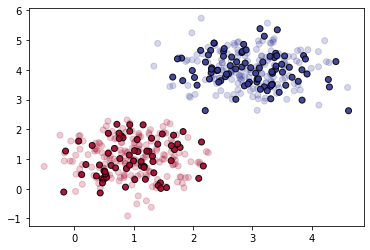

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#生成一组数据
sample_size = 500
centers = [[1,1], [3,4]]
X, Y = make_blobs(n_samples = sample_size, centers = centers, 
                  cluster_std = 0.6,random_state=20)

#将y=0替换成y=-1
Y[Y == 0] = -1  

#切分数据集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

#可视化样本点
plt.scatter(Xtrain[:,0], Xtrain[:,1],cmap='RdYlBu', c = Ytrain,alpha=0.2) #训练集（浅色）
plt.scatter(Xtest[:,0], Xtest[:,1],cmap='RdYlBu', c = Ytest,alpha=0.9,edgecolors='black') #测试集（深色）

In [220]:
#实例化感知机
p = Ken_Perceptron(method='batch')
p.fit(Xtrain,Ytrain)
#查看最终的w 和 b
print('w = ',p.w_.ravel())
print('b = ',p.b_)
#p.w_list_ #查看每个循环的w
#p.b_list_  #查看每个循环的b

w =  [[ 3.04370478 18.82180379]]
b =  -54.6


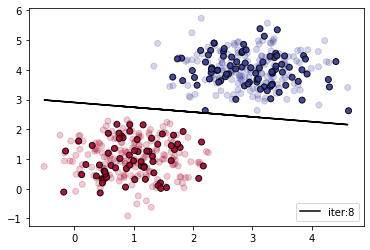

In [221]:
#可视化结果
##样本的颜色代表标签label
##浅色的是训练样本，深色的是测试样本，黑色线为最终计算的超平面
##右下角的legend是寻找超平面所迭代的次数
p.plot(Xtest=Xtest,Ytest=Ytest)

In [223]:
#对测试集进行预测
p.predict(Xtest)

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,
       -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
        1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [222]:
#对测试集和训练集进行预测评估 accuracy
p.score(Xtest,Ytest),p.score(Xtrain,Ytrain)

(1.0, 1.0)

Using matplotlib backend: Qt5Agg


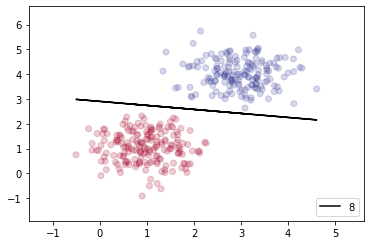

In [224]:
p.demo(time=0.2)

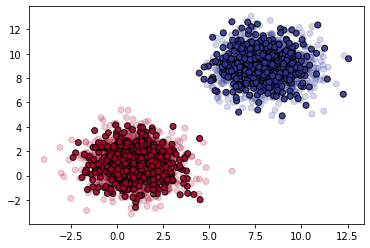

In [257]:
#生成一组数据
sample_size = 3000
centers = [[1,1], [8,9]]
X, Y = make_blobs(n_samples = sample_size, centers = centers, 
                  cluster_std = 1.3,random_state=20)

#将y=0替换成y=-1
Y[Y == 0] = -1  

#切分数据集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

#可视化样本点
plt.scatter(Xtrain[:,0], Xtrain[:,1],cmap='RdYlBu', c = Ytrain,alpha=0.2) #训练集（浅色）
plt.scatter(Xtest[:,0], Xtest[:,1],cmap='RdYlBu', c = Ytest,alpha=0.9,edgecolors='black') #测试集（深色）

[0. 0. 0. ... 0. 0. 0.]
Using matplotlib backend: Qt5Agg


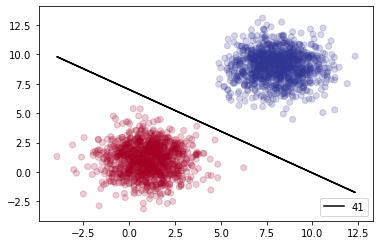

In [264]:
#使用stochastic gradient descend （sgd）寻找超平面的demo
p1 = Ken_Perceptron(method='stochastic',max_iteration=5000)
p1.fit(Xtrain,Ytrain)
# p1.a_  查看a值
p1.demo(time=0.1)

In [265]:
p1.a_

array([0., 0., 0., ..., 0., 0., 0.])